In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from sklearn import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import adam_v2
from keras.utils.np_utils import to_categorical
import random

In [9]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state = 123, centers=centers, cluster_std=0.4)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

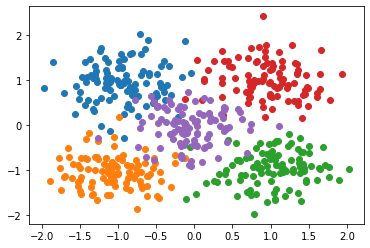

In [10]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
 
print(y)

In [11]:
y_cat = to_categorical(y, 5)
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [12]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
model.compile(adam_v2.Adam(0.1), 'categorical_crossentropy', metrics=['accuracy'])

In [13]:
#one hot encode output
model.fit(x = X, y = y_cat, verbose = 1, batch_size = 50, epochs = 100)

Epoch 1/100
10/10 [==============================] - 1s 1ms/step - loss: 1.1415 - accuracy: 0.5600
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5867 - accuracy: 0.8400
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.9220
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.9360
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2826 - accuracy: 0.9420
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2568 - accuracy: 0.9400
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2400 - accuracy: 0.9420
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2296 - accuracy: 0.9480
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2177 - accuracy: 0.9480
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2111 - accuracy: 0.9480
Epoch 11/

In [14]:
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = np.argmax(model.predict(grid), axis =-1 )
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

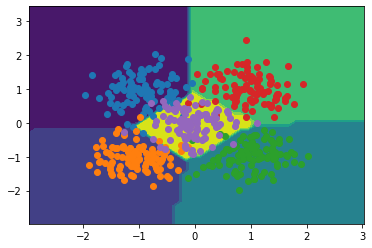

In [15]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])